In [1]:
# https://www.kesci.com/mw/project/5da6bd34c83fb40042068a41

In [2]:
# 神经网络，在该练习中我们将再次用到神经网络 来训练辨别手写数字 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

In [4]:
data = loadmat(r'D:\Plus\PYTHON\吴恩达练习\data_sets\ex4data1.mat')
data['X'].shape,data['y'].shape

((5000, 400), (5000, 1))

In [5]:
weight = loadmat(r'D:\Plus\PYTHON\吴恩达练习\data_sets\ex4weights.mat')
weight['Theta1'].shape,weight['Theta2'].shape

((25, 401), (10, 26))

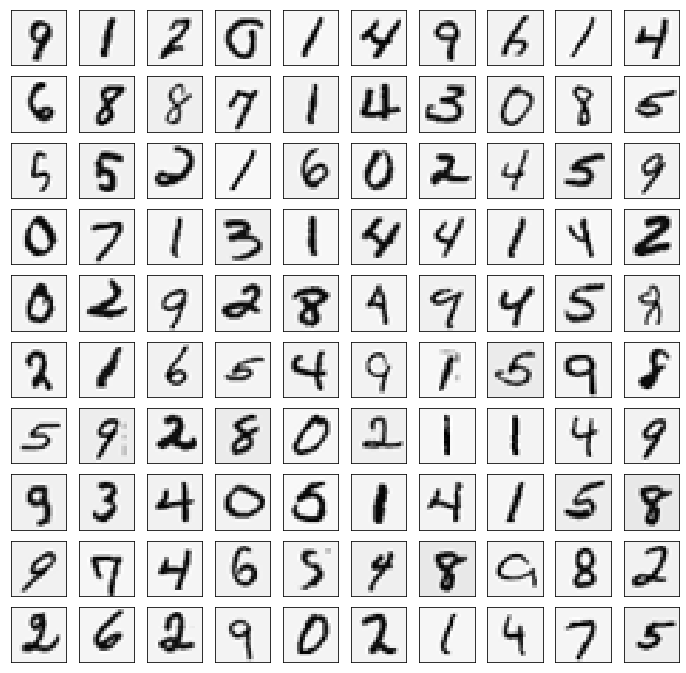

In [6]:
sample_idx = np.random.choice(np.arange(data['X'].shape[0]),100)
sample_images = data['X'][sample_idx,:]
fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10 * r + c].reshape((20, 20))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [8]:
def forward_propagate(X,theta1,theta2):
    m = X.shape[0]

    a1 = np.insert(X,0,values = np.ones(m),axis = 1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 * theta2.T
    h = sigmoid(z3)

    return a1,z2,a2,z3,h

In [9]:
def cost(theta1,theta2,input_size,hidden_size,num_labels,X,y,learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    a1,z2,a2,z3,h = forward_propagate(X,theta1,theta2)
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:],np.log(h[i,:]))
        second_term = np.multiply(1-y[i,:],np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    J = J/m 
    return J

In [10]:
#对y进行编码 本来的y时（5000，1） 我们把它变成（5000，10）
#Scikitlearn有一个内置的编码函数，我们可以使用这个。
encoder = OneHotEncoder(sparse = False)
y_onehot = encoder.fit_transform(data['y'])
y_onehot.shape


(5000, 10)

In [32]:
#初始化参数
input_size = 400 #输入层的单元个数
hidden_size = 25 #隐藏层的单元个数
num_labels = 10 #几个标签类
learning_rate = 1


10285

In [12]:
cost(weight['Theta1'],weight['Theta2'],input_size,hidden_size,num_labels,data['X'],y_onehot,learning_rate)

0.2876291651613188

In [17]:
def costReg(theta1,theta2,input_size,hidden_size,num_labels,X,y,learning_rate):
    X = np.matrix(X)
    y = np.matrix(y)
    m = X.shape[0]

    a1,z2,a2,z3,h = forward_propagate(X,theta1,theta2)

    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:],np.log(h[i,:]))
        second_term = np.multiply(1-y[i,:],np.log(1-h[i,:]))
        J += np.sum(first_term - second_term)
    J = J/m

    J += float(learning_rate/(2*m))*(np.sum(np.power(theta1[:,1:],2)) + np.sum(np.power(theta2[:,1:],2)))

    return J  

In [18]:
costReg(weight['Theta1'],weight['Theta2'],input_size,hidden_size,num_labels,data['X'],y_onehot,learning_rate)

0.38376985909092354

In [21]:
# 反向传播
#sigmoid 的梯度函数：
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z),1-sigmoid(z))

In [24]:
sigmoid_gradient(0)  #sigmoid函数在 x = 0 处的倒数为0.25

0.25

In [33]:
#随机化初始值 np.random.random(size) 会返回(0,1)之间 size大小(数列大小）的随机数
params = (np.random.random(size = hidden_size * (input_size + 1) + num_labels * (hidden_size + 1))-0.5)*0.24
params.shape

(10285,)

In [34]:
# 反向传播
def backprop(params,input_size,hidden_size,num_labels,X,y,learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    a1,z2,a2,z3,h = forward_propagate(X,theta1,theta2)

    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size+1)],(hidden_size,(input_size+1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size):],(num_labels,(hidden_size+1))))

    J = 0
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)

    #comput the cost
    for i in range(m):
        first_term = np.multiply(-y[:,],np.log(h[:,]))
        second_term = np.multiply(1-y[:,],np.log(1-h[:,]))
        J += np.sum(first_term - second_term)

    J = J/m

    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)

        d3 = ht - yt # (1,10)
        
        z2t = np.insert(z2t,0,values = np.ones(1))# (1,26)
        d2t = np.multiply((theta2.T * d3t.T).T,sigmoid_gradient(z2t))

        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m

    return J, delta1, delta2


In [35]:
def backpropReg(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    # perform backpropagation
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t))  # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # add the gradient regularization term
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad

In [37]:
from scipy.optimize import minimize

# minimize the objective function
fmin = minimize(fun=backpropReg, x0=(params), args=(input_size, hidden_size, num_labels, data['X'], y_onehot, learning_rate), method='TNC', jac=True, options={'maxiter': 250})
fmin

     fun: 0.3326364394580349
     jac: array([ 2.42755349e-04, -2.81992587e-08, -1.41939634e-07, ...,
       -3.52497210e-05,  1.07622045e-04,  1.02973139e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 21
  status: 3
 success: False
       x: array([-1.39923581e+00, -1.40996294e-04, -7.09698170e-04, ...,
       -2.73959186e-01,  1.79049385e+00,  1.56057619e+00])

In [38]:
X = np.matrix(data['X'])
thetafinal1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
thetafinal2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

In [49]:
a1,z2,a2,z3,h = forward_propagate(X,thetafinal1,thetafinal2)
y_pre = np.array(np.argmax(h,axis=1)+1)
y_pre

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(data['y'],y_pre))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       500
           2       0.99      0.99      0.99       500
           3       0.99      0.99      0.99       500
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      0.99      0.99       500
           7       0.99      0.99      0.99       500
           8       1.00      1.00      1.00       500
           9       0.99      0.99      0.99       500
          10       0.99      1.00      1.00       500

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [54]:
hidden_layer = thetafinal1[:,1:]
hidden_layer.shape

(25, 400)

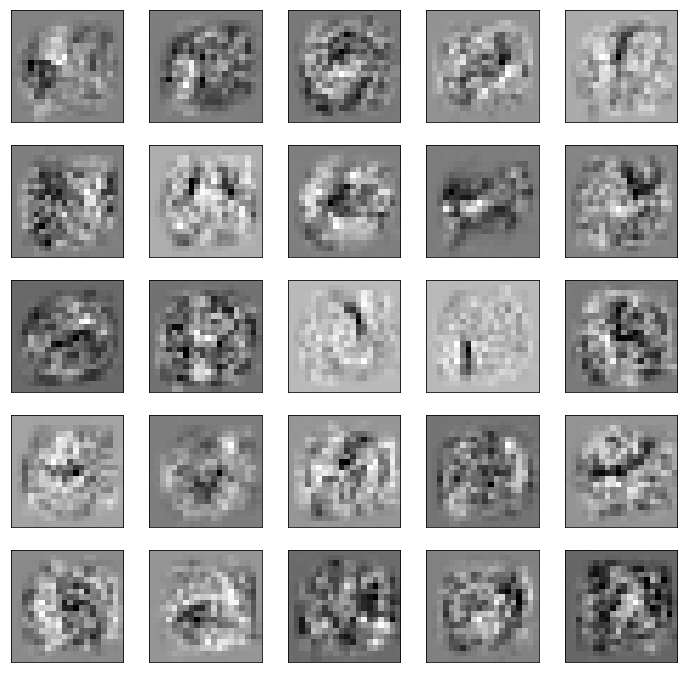

In [55]:
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(hidden_layer[5 * r + c].reshape((20, 20))),cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))